In [38]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv as csv
import itertools 
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from itertools import chain

In [47]:
with open('./cannabinoid_receptor_data.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    structures = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

In [4]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [12:16:20] Explicit valence for atom # 7 N, 4, is greater than permitted
[12:16:20] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [12:16:20] ERROR: Could not sanitize molecule ending on line 20009
[12:16:20] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [12:16:20] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[12:16:20] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[12:16:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10

RDKit ERROR: [12:16:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [12:16:20] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [12:16:20] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[12:16:20] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: 
RDKit ERROR: [12:16:20] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: 

[12:16:20] ERROR: Could not sanitize molecule ending on line 357505
RDKit ERROR: [12:16:20] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
[12:16:20] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13

[12:16:20] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7

RDKit ERROR: 
RDKit ERROR: [12:16:20] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
RDKit ERROR: 
RDKit ERROR: [12:16:20] ERROR: Could not sanitize molecule ending on line 371006
[12:16:20] ERROR: Could not sanitize molecule ending on line 371006
RDKit ERROR: [12:16:20] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[12:16:20] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7

[12:16:21] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9

RDKit ERROR: 
RDKit ERROR: [12:16:21] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [12:16:21] ERROR: Could not sanitize molecule ending on line 378618
[12:16:21] ERROR: Could not saniti

[12:16:21] ERROR: Could not sanitize molecule ending on line 604912
RDKit ERROR: [12:16:21] ERROR: Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
RDKit ERROR: 
RDKit ERROR: [12:16:21] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [12:16:21] ERROR: Could not sanitize molecule ending on line 616025
[12:16:21] ERROR: Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12

[12:16:21] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13

[12:16:21] ERROR: Could not sanitize molecule ending on line 616025
RDKit ERROR: [12:16:21] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
[12:16:21] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13

[12:16:21] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10

RDKit ERROR: 
RDKit ERROR: [12:16:21] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [12:16:21] ERROR: Could not sanitize molecule ending o

In [5]:
ethanol_pattern = Chem.MolFromSmarts('CCO')
propanol = Chem.MolFromSmiles('CCCO')
propanol.HasSubstructMatch(ethanol_pattern)

True

In [6]:
toluene = Chem.MolFromSmiles('Cc1ccccc1')
toluene.HasSubstructMatch(ethanol_pattern)

False

In [7]:
citric_acid = Chem.MolFromSmiles('OC(=O)CC(O)(C(=O)O)CC(=O)O')
citric_acid.HasSubstructMatch(ethanol_pattern)

True

In [9]:
hit_atoms = propanol.GetSubstructMatch(ethanol_pattern)
hit_bonds = [propanol.GetBondBetweenAtoms(i, j).GetIdx()
             for i, j in itertools.combinations(hit_atoms, 2)
             if propanol.GetBondBetweenAtoms(i, j)]
hit_atoms, hit_bonds

((1, 2, 3), [1, 2])

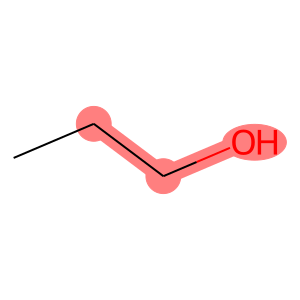

In [13]:
d = rdMolDraw2D.MolDraw2DSVG(300,300)
rdMolDraw2D.PrepareAndDrawMolecule(d, propanol, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
d.FinishDrawing()
display(SVG(d.GetDrawingText()))

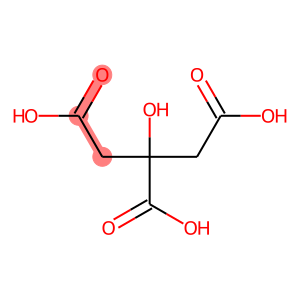

In [14]:
d = rdMolDraw2D.MolDraw2DSVG(300,300)
rdMolDraw2D.PrepareAndDrawMolecule(d, citric_acid, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
d.FinishDrawing()
display(SVG(d.GetDrawingText()))

In [18]:
substructure = Chem.MolFromSmarts('CC=O')
print(citric_acid.GetSubstructMatches(substructure))

((3, 1, 2), (4, 6, 7), (9, 10, 11))


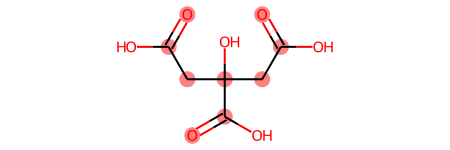

In [19]:
citric_acid

I mean, how do I highlight the bonds? Nvrm.

In [35]:
benzene_pattern = Chem.MolFromSmarts('c1ccccc1')
ortho_O = Chem.MolFromSmarts('CaaO')
alip = Chem.MolFromSmarts('C')
carbox = Chem.MolFromSmarts('C(=O)O')

In [50]:
len(structures)

5992

In [51]:
count = 0
for d in structures:
    if d.HasSubstructMatch(benzene_pattern):
        count = count + 1
print(count)

5312


In [52]:
count = 0
for d in structures:
    if d.HasSubstructMatch(benzene_pattern) and d.HasSubstructMatch(ortho_O):
        count = count + 1
print(count)

683


In [53]:
count = 0
for s in structures:
    if d.HasSubstructMatch(alip):
        count = count + 1
print(count)

5992


In [54]:
count = 0
for d in structures:
    if d.HasSubstructMatch(carbox):
        count = count + 1
print(count)

593


**PAINs - pains in the ass, ty tam nechcem a bylo by dobré je vyfiltrovat.**

In [39]:
pains = []
with open('./pains/p_l15.txt', 'r') as f, open('./pains/p_m150.txt', 'r') as p:
    for line in chain(f, p):
        pattern, text = line.strip().split('\t') # split by tab
        pains.append([Chem.MolFromSmarts(pattern),
                      text.lstrip("<regId=\"").rstrip("\">")]) # remove the xml tags
pains, len(pains)

([[<rdkit.Chem.rdchem.Mol at 0x7f56f573aee0>, 'anil_di_alk_F(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f56f5798da0>, 'hzone_anil(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f56f573ae40>, 'het_5_pyrazole_OH(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f56f573e350>, 'het_thio_666_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f56f573e3f0>, 'styrene_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f56f573e490>, 'ne_rhod_C(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f56f573e530>, 'hp_amino_CN_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f56f573e580>, 'cyano_imine_C(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f56f573e5d0>, 'thio_urea_A(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f56f573e670>, 'thiophene_amino_B(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f56f573e710>, 'keto_keto_beta_B(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f56f573e760>, 'keto_phenone_A(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f56f573e800>, 'cyano_pyridone_C(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f56f573e8a0>, 'thiaz_ene_C(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f56f573e940>, '

In [48]:
for m in structures:
    m.pain_hits = [i for i, pain in enumerate(pains) if m.HasSubstructMatch(pain[0])]

structures_with_pains = [m for m in mtor_ligands if m.pain_hits]
len(structures_with_pains)

141

In [49]:
len(structures)

5992

**Táákže tu mám 141 PAINs, což je oproti nějakým 6k struktur zanedbatelné množství.**

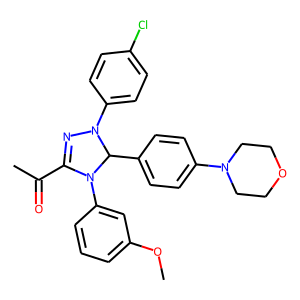

In [43]:
Draw.MolToImage(mtor_with_pains[0])

In [44]:
mtor_with_pains[0].pain_hits, pains[mtor_with_pains[0].pain_hits[0]]

([422], [<rdkit.Chem.rdchem.Mol at 0x7f56f574ef80>, 'anil_di_alk_D(198)'])

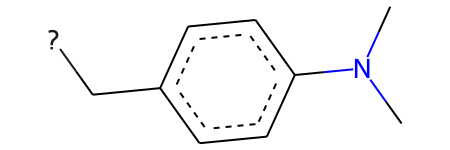

In [45]:
pains[mtor_with_pains[0].pain_hits[0]][0]

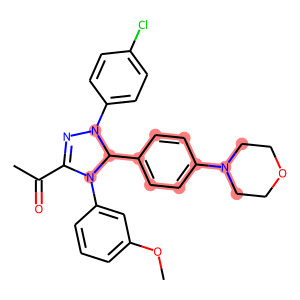

In [46]:
visualize_match(mtor_with_pains[0], pains[mtor_with_pains[0].pain_hits[0]][0])

Ktery pain je nejcastejsi? Teoreticky mohou byt falesne pozitivni.